Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 26-May-2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set experiment names and frequencies 
experiment_names = ['BDN2','BDN2_web','DNg12','DNg12_web']
freqs = [50,100,150] 
chief_9A_ids = [100513, 13157, 14517] # T1L, T2L, T3L

# Initialize variables
simulation_results = np.zeros((len(chief_9A_ids), len(experiment_names)*len(freqs)))

# Loop over experiments
column_index = 0
for experiment_index, experiment_name in enumerate(experiment_names):
    
    # Loop over freqs
    for freq_index, freq in enumerate(freqs):
        # Read simulation results 
        path_to_csv = "../data/simulation/" + experiment_name + "/" + str(freq) + "Hz.csv"
        df = pd.read_csv(path_to_csv)

        # Loop over chief 9A IDs
        for row_index, chief_9A_id in enumerate(chief_9A_ids):
            if chief_9A_id in df.connectome_id.tolist():
                simulation_results[row_index,column_index] = df.spike_frequency[df.connectome_id == chief_9A_id].item()

        column_index += 1

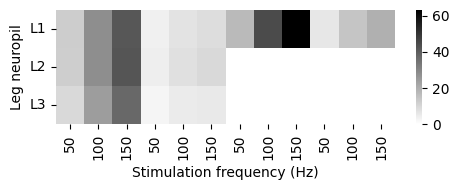

In [3]:
# Plot simulation results 
fig = plt.figure(figsize=(5,2))
cmap = sns.color_palette("gray_r", as_cmap=True)
xticklabels =  [50,100,150,50,100,150,50,100,150,50,100,150]
yticklabels = ['L1','L2','L3']
sns.heatmap(simulation_results, 
            cmap=cmap,
            xticklabels=xticklabels, 
            yticklabels=yticklabels)            
plt.ylabel('Leg neuropil')
plt.xlabel('Stimulation frequency (Hz)')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()